# Lab: Titanic EDA

This week was all about Pandas and plotting. At this point you should be chomping at the bit to get your hands dirty on a real-world dataset.

For this lab, we're going to take a look at the Titanic manifest. We'll be exploring this data to see what we can learn regarding the survival rates of different groups of people.

## Step 1: Reading the data

In the [notebook](./Titanic.ipynb) provided, do the following:

1. Import `pandas` and `matplotlib.pyplot`
2. Load [train.csv](./train.csv) as a `pandas` DataFrame.
3. In each of the following sections, copy the question as a python comment, then answer the question with your own code.
4. Refer to the [Titanic Kaggle competition](https://www.kaggle.com/c/titanic/data) if you need an explanation for any of the columns.

In [1]:
#1. Import pandas and matplotlib.pyplot
import pandas as pd
import numpy as np
import missingno

import matplotlib.pyplot as ply
import seaborn

In [2]:
#2. Load train.csv as a pandas DataFrame.
df = pd.read_csv('./train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Step 2: Cleaning the data

1. Create a bar chart showing how many missing values are in each column
    - *Bonus* : Theres a good library for visualizing missing values called Missingno.
        - [Install Instructions](https://pypi.org/project/missingno/)
        - [Usage Documentation](https://github.com/ResidentMario/missingno)
2. Which column has the most `NaN` values? How many cells in that column are empty?
3. Delete all rows where `Embarked` is empty
4. Fill all empty cabins with **¯\\_(ツ)_/¯**

**Note: `NaN`, empty, and missing are synonymous.**

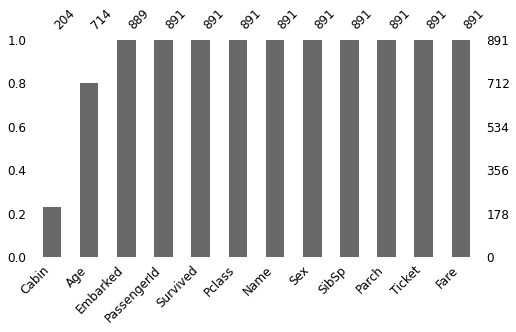

In [4]:
#1. Create a bar chart showing how many missing values are in each column
#  - *Bonus* : Theres a good library for visualizing missing values called Missingno.
#      - [Install Instructions](https://pypi.org/project/missingno/)
#      - [Usage Documentation](https://github.com/ResidentMario/missingno)

missingno.bar(df,
              figsize = (8, 4),
              fontsize = 12,
              sort = 'ascending');

In [5]:
#2. Which column has the most `NaN` values? How many cells in that column are empty?
df.isna().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [6]:
#3. Delete all rows where `Embarked` is empty
df.dropna(subset = ['Embarked'], inplace = True)

In [7]:
df['Embarked'].isna().sum()

0

In [8]:
#4. Fill all empty cabins with **¯\\_(ツ)_/¯**
#https://towardsdatascience.com/difference-between-apply-and-transform-in-pandas-242e5cf32705

df['Cabin'].fillna(value = '**¯\\_(ツ)_/¯**', inplace = True)

In [9]:
df['Cabin'].isna().sum()

0

## Step 3: Feature extraction
1.  There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.
2. Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.
3. In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`:
    - Familiarize yourself with the [`pd.get_dummies` documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)
    - Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column
    - Do the same thing for `Sex`
    - BONUS: Extract the title from everyone's name and create dummy columns

In [27]:
### Step 3: Feature extraction
#1.  There are two columns that pertain to how many family members are on the boat for a given person.
#Create a new column called `FamilyCount` which will be the sum of those two columns.
df[['SibSp', 'Parch']].head()

,SibSp,Parch
0,1,0
1,1,0
2,0,0
3,1,0
4,0,0


In [28]:
df['FamilyCount'] = df['SibSp'] + df['Parch']

In [30]:
df[['SibSp', 'Parch', 'FamilyCount']].head()

,SibSp,Parch,FamilyCount
0,1,0,1
1,1,0,1
2,0,0,0
3,1,0,1
4,0,0,0


In [37]:
#2. Reverends have a special title in their name. 
#Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.
df['IsReverend'] = np.where(df['Name'].str.contains('Rev'), 1, 0)
df[['IsReverend']].head()

,IsReverend
0,0
1,0
2,0
3,0
4,0


In [38]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,is_reverend,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,**¯\_(ツ)_/¯**,S,1,False,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,False,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,**¯\_(ツ)_/¯**,S,0,False,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,False,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,**¯\_(ツ)_/¯**,S,0,False,0


In [12]:
#3. In order to feed our training data into a classification algorithm, 
#we need to convert our categories into 1's and 0's using `pd.get_dummies`
#  - Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. 
#    These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column
#  - Do the same thing for `Sex`
#  - BONUS: Extract the title from everyone's name and create dummy columns

In [41]:
df = pd.get_dummies(df, columns = ['Embarked', 'Sex'])

In [42]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,is_reverend,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,**¯\_(ツ)_/¯**,1,False,0,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,False,0,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,**¯\_(ツ)_/¯**,0,False,0,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,False,0,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,**¯\_(ツ)_/¯**,0,False,0,0,0,1,0,1


## Step 4: Exploratory analysis 
_[`df.groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) may be very useful._

1. What was the survival rate overall?
2. Which gender fared the worst? What was their survival rate?
3. What was the survival rate for each `Pclass`?
4. Did any reverends survive? How many?
5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**
6. What is the survival rate for people whose `Age` is empty?
7. What is the survival rate for each port of embarkation?
8. What is the survival rate for children (under 12) in each `Pclass`?
9. Did the captain of the ship survive? Is he on the list?
10. Of all the people that died, who had the most expensive ticket? How much did it cost?
11. Does having family on the boat help or hurt your chances of survival?

In [13]:
#1. What was the survival rate overall?


In [14]:
#2. Which gender fared the worst? What was their survival rate?


In [15]:
#3. What was the survival rate for each `Pclass`?


In [16]:
#4. Did any reverends survive? How many?


In [17]:
#5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**


In [18]:
#6. What is the survival rate for people whose `Age` is empty?


In [19]:
#7. What is the survival rate for each port of embarkation?


In [20]:
#8. What is the survival rate for children (under 12) in each `Pclass`?


In [21]:
#9. Did the captain of the ship survive? Is he on the list?


In [22]:
#10. Of all the people that died, who had the most expensive ticket? How much did it cost?


In [23]:
#11. Does having family on the boat help or hurt your chances of survival?


## Step 5: Plotting
Using Matplotlib and Seaborn, create several charts showing the survival rates of different groups of people. 

It's fine if a handful of charts are basic (Gender, Age, etc), but what we're really looking for is something beneath the surface.